1/1 [==============================] - 0s 50ms/step
Root Mean Squared Error (RMSE): 121.98340151206027


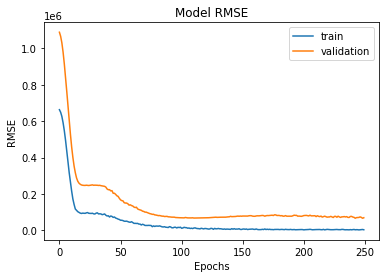

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


data = pd.read_csv('processed_file_4.csv')


target_column = 'Cycle'


# correlation = data.corr()[target_column]


# highly_correlated_features = correlation[(correlation > 0.5)].index.tolist()


highly_correlated_features = ['Cell']


X = data.drop(columns=highly_correlated_features)



y = data[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
#     Dense(256, activation='sigmoid'),
#     Dropout(0.1),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(1)
])


model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=10, validation_split=0.2, verbose=0)


y_pred = model.predict(X_test_scaled).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


1/1 [==============================] - 0s 78ms/step
Root Mean Squared Error (RMSE): 180.40631134897671


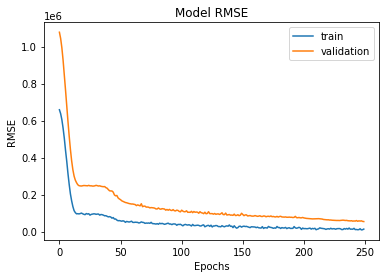

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

data = pd.read_csv('processed_file_4.csv')


target_column = 'Cycle'


correlation = data.corr()[target_column]

highly_correlated_features = correlation[(correlation > 0.5)| (correlation<-0.5) ].index.tolist()

highly_correlated_features += ['Cell']


X = data.drop(columns=highly_correlated_features)



y = data[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
#     Dense(256, activation='sigmoid'),
#     Dropout(0.1),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(1)
])


model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=10, validation_split=0.2, verbose=0)


y_pred = model.predict(X_test_scaled).flatten()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [48]:

percentage_error = np.abs((y_test - y_pred) / y_test) * 100


mean_percentage_error = np.mean(percentage_error)

print(f"Mean Percentage Error on Test Set: {mean_percentage_error:.2f}%")


Mean Percentage Error on Test Set: 17.14%


In [2]:
print(highly_correlated_features)

['Cycle', 'Cell']


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR  # Use SVR for regression
from sklearn.metrics import mean_squared_error
import numpy as np


data = pd.read_csv('processed_file_4.csv')


feature_columns = data.columns


columns_to_drop = ['Cell', 'Cycle']


X = data[feature_columns].drop(columns=columns_to_drop, axis=1)


target_column = 'Cycle'


y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVR(kernel='linear', C=1.0)  
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 396.2667762042124


In [33]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto'],  
    'epsilon': [0.1, 0.01, 0.001],  
}


svm = SVR()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) with Grid Search and Cross-Validation: {rmse}")


Best Parameters: {'C': 100, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
Root Mean Squared Error (RMSE) with Grid Search and Cross-Validation: 215.4324004629008


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np


data = pd.read_csv('processed_file_4.csv')


feature_columns = data.columns

columns_to_drop = ['Cell', 'Cycle']


X = data[feature_columns].drop(columns=columns_to_drop, axis=1)


target_column = 'Cycle'


y = data[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net_model = ElasticNet(alpha=0.11, l1_ratio=0.7)  
elastic_net_model.fit(X_train_scaled, y_train)


y_pred = elastic_net_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 207.99611605931514


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np


data = pd.read_csv('processed_file_4.csv')


feature_columns = data.columns


columns_to_drop = ['Cell', 'Cycle']


X = data[feature_columns].drop(columns=columns_to_drop, axis=1)


target_column = 'Cycle'


y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'alpha': [0.1, 0.5, 1.0],          
    'l1_ratio': [0.1, 0.5, 0.9],        
}


elastic_net_model = ElasticNet()


grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)


y_pred = best_estimator.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) with Grid Search: {rmse}")


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Root Mean Squared Error (RMSE) with Grid Search: 211.5908744957338


1/1 [==============================] - 0s 57ms/step
Root Mean Squared Error (RMSE): 74.0873849815588


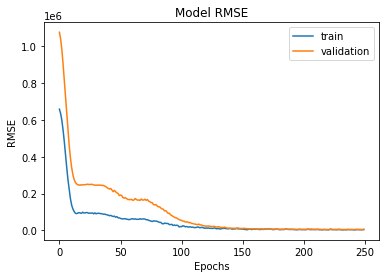

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


data = pd.read_csv('processed_file_5.csv')


target_column = 'Cycle'




highly_correlated_features = ['Cell']


X = data.drop(columns=highly_correlated_features)



y = data[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='sigmoid'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
#     Dense(256, activation='sigmoid'),
#     Dropout(0.1),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(1)
])


model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=10, validation_split=0.2, verbose=0)


y_pred = model.predict(X_test_scaled).flatten()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor


data = pd.read_csv('processed_file_4.csv')


target_column = 'Cycle'

features_to_drop = ['Cell']

X = data.drop(columns=features_to_drop)


y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)


xgb_model.fit(X_train_scaled, y_train)


y_pred_xgb = xgb_model.predict(X_test_scaled)


rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")


C:\Users\riori\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\riori\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\riori\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Root Mean Squared Error (RMSE): 39.39603081843933


Root Mean Squared Error (RMSE) for processed_file_0-10.csv: 39.36953464572046
Root Mean Squared Error (RMSE) for processed_file_10-20.csv: 39.36897069785823
Root Mean Squared Error (RMSE) for processed_file_20-30.csv: 39.371165692530695
Root Mean Squared Error (RMSE) for processed_file_30-40.csv: 39.371521149919964
Root Mean Squared Error (RMSE) for processed_file_40-50.csv: 39.37067795725764
Root Mean Squared Error (RMSE) for processed_file_50-60.csv: 39.37014055621496
Root Mean Squared Error (RMSE) for processed_file_60-70.csv: 39.36644469196476
Root Mean Squared Error (RMSE) for processed_file_70-80.csv: 39.36873237789986
Root Mean Squared Error (RMSE) for processed_file_80-90.csv: 39.369796585295845
Root Mean Squared Error (RMSE) for processed_file_90-100.csv: 39.36925191338944


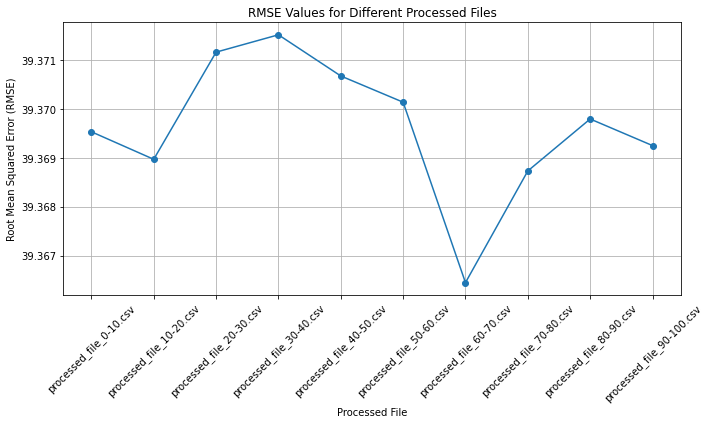

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
import os
import matplotlib.pyplot as plt

def calculate_rmse(filename):
   
    data = pd.read_csv(filename)

 
    target_column = 'Cycle'

    features_to_drop = ['Cell']

    X = data.drop(columns=features_to_drop)

 
    y = data[target_column]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)


    xgb_model.fit(X_train_scaled, y_train)

    y_pred_xgb = xgb_model.predict(X_test_scaled)


    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

    return rmse_xgb

processed_files = [f'processed_file_{i}-{i+10}.csv' for i in range(0, 100, 10)]


rmse_values = []
existing_files = []

for file in processed_files:
    if os.path.exists(file):
        rmse = calculate_rmse(file)
        rmse_values.append(rmse)
        existing_files.append(file)
        print(f"Root Mean Squared Error (RMSE) for {file}: {rmse}")
    else:
        print(f"File not found: {file}")


plt.figure(figsize=(10, 6))
plt.plot(existing_files, rmse_values, marker='o')
plt.title('RMSE Values for Different Processed Files')
plt.xlabel('Processed File')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


1/1 [==============================] - 0s 51ms/step


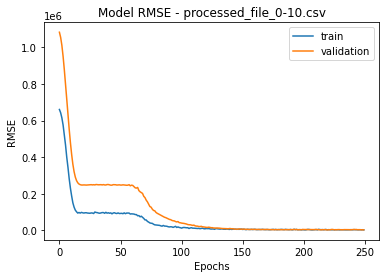

Root Mean Squared Error (RMSE) for processed_file_0-10.csv: 72.76590554587551
1/1 [==============================] - 0s 42ms/step


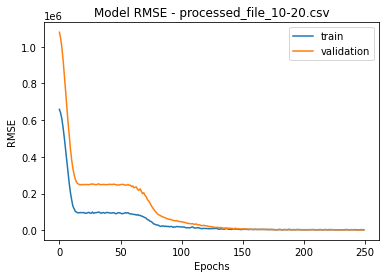

Root Mean Squared Error (RMSE) for processed_file_10-20.csv: 94.88737245286616
1/1 [==============================] - 0s 50ms/step


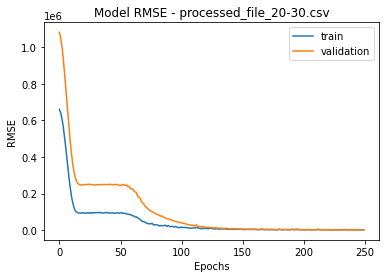

Root Mean Squared Error (RMSE) for processed_file_20-30.csv: 56.89868525724571
1/1 [==============================] - 0s 48ms/step


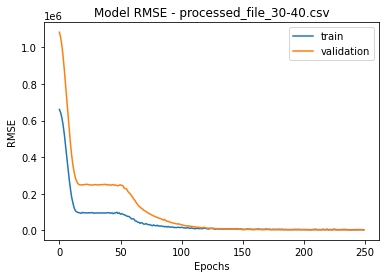

Root Mean Squared Error (RMSE) for processed_file_30-40.csv: 83.39392039153014
1/1 [==============================] - 0s 49ms/step


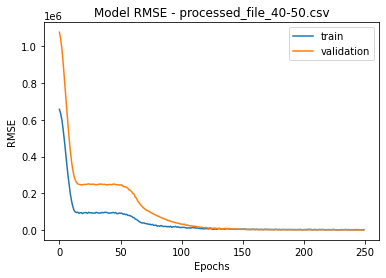

Root Mean Squared Error (RMSE) for processed_file_40-50.csv: 83.03302623291292
1/1 [==============================] - 0s 57ms/step


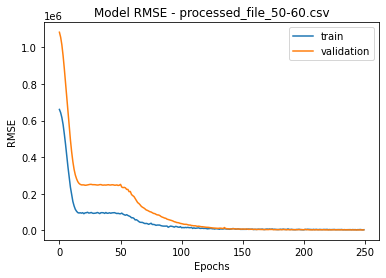

Root Mean Squared Error (RMSE) for processed_file_50-60.csv: 73.72799590601811
1/1 [==============================] - 0s 51ms/step


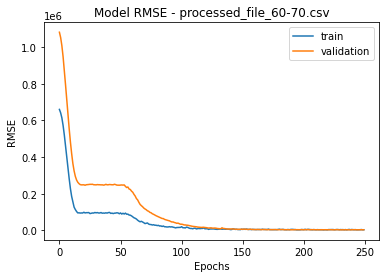

Root Mean Squared Error (RMSE) for processed_file_60-70.csv: 77.83981627418368
1/1 [==============================] - 0s 60ms/step


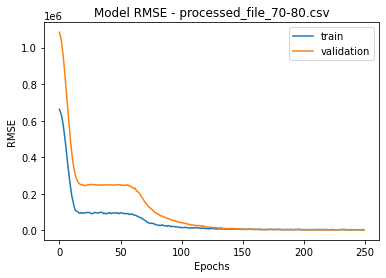

Root Mean Squared Error (RMSE) for processed_file_70-80.csv: 74.11253333298632
1/1 [==============================] - 0s 64ms/step


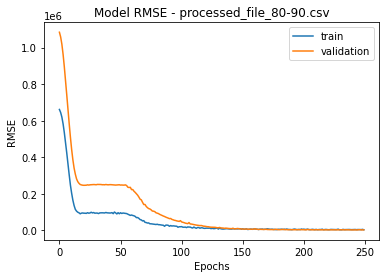

Root Mean Squared Error (RMSE) for processed_file_80-90.csv: 81.92269631987085
1/1 [==============================] - 0s 50ms/step


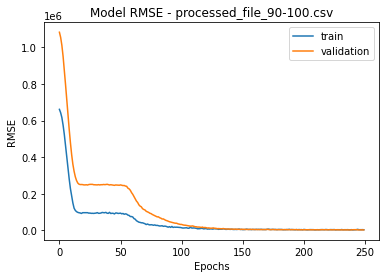

Root Mean Squared Error (RMSE) for processed_file_90-100.csv: 74.13371067889503


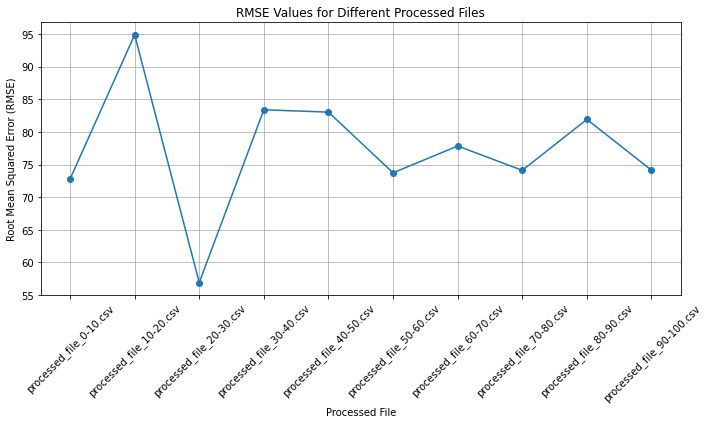

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import os

def calculate_rmse_and_plot(filename):

    data = pd.read_csv(filename)


    target_column = 'Cycle'

    highly_correlated_features = ['Cell']

    X = data.drop(columns=highly_correlated_features)


    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    model = Sequential([
        Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.1),
        Dense(128, activation='sigmoid'),
        Dropout(0.1),
        Dense(256, activation='sigmoid'),
        Dropout(0.1),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(1)
    ])


    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])


    history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=10, validation_split=0.2, verbose=0)


    y_pred = model.predict(X_test_scaled).flatten()


    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'Model RMSE - {filename}')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    return rmse


processed_files = [f'processed_file_{i}-{i+10}.csv' for i in range(0, 100, 10)]


rmse_values = []
existing_files = []

for file in processed_files:
    if os.path.exists(file):
        rmse = calculate_rmse_and_plot(file)
        rmse_values.append(rmse)
        existing_files.append(file)
        print(f"Root Mean Squared Error (RMSE) for {file}: {rmse}")
    else:
        print(f"File not found: {file}")


plt.figure(figsize=(10, 6))
plt.plot(existing_files, rmse_values, marker='o')
plt.title('RMSE Values for Different Processed Files')
plt.xlabel('Processed File')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
